In [1]:
import nibabel as nib
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Function to load NIfTI images
def load_nifti(filename):
    img = nib.load(filename)
    data = img.get_fdata()
    return data


In [2]:
# Define class names and corresponding file paths
class_paths = {'DL_Dataset/group with dyslexia': ["DL_Dataset/group with dyslexia/sub-047EPKL011005/ses-1/anat/sub-047EPKL011005_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL011011/ses-1/anat/sub-047EPKL011011_ses-1_T1w.nii.gz",
             "DL_Dataset/group with dyslexia/sub-047EPKL011012/ses-1/anat/sub-047EPKL011012_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL011041/ses-1/anat/sub-047EPKL011041_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL011047/ses-1/anat/sub-047EPKL011047_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL011049/ses-1/anat/sub-047EPKL011049_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL011051/ses-1/anat/sub-047EPKL011051_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL011056/ses-1/anat/sub-047EPKL011056_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL011058/ses-1/anat/sub-047EPKL011058_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL011059/ses-1/anat/sub-047EPKL011059_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL011060/ses-1/anat/sub-047EPKL011060_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL011063/ses-1/anat/sub-047EPKL011063_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL011068/ses-1/anat/sub-047EPKL011068_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL012014/ses-1/anat/sub-047EPKL012014_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL012015/ses-1/anat/sub-047EPKL012015_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL012017/ses-1/anat/sub-047EPKL012017_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL012069/ses-1/anat/sub-047EPKL012069_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL012071/ses-1/anat/sub-047EPKL012071_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL012073/ses-1/anat/sub-047EPKL012073_ses-1_T1w.nii.gz",
              "DL_Dataset/group with dyslexia/sub-047EPKL012074/ses-1/anat/sub-047EPKL012074_ses-1_T1w.nii.gz"],
    'DL_Dataset/SpD group': [
              "DL_Dataset/SpD group/sub-047EPKL013003/ses-1/anat/sub-047EPKL013003_ses-1_T1w.nii.gz",
              "DL_Dataset/SpD group/sub-047EPKL013013/ses-1/anat/sub-047EPKL013013_ses-1_T1w.nii.gz",
              "DL_Dataset/SpD group/sub-047EPKL013016/ses-1/anat/sub-047EPKL013016_ses-1_T1w.nii.gz",
              "DL_Dataset/SpD group/sub-047EPKL013019/ses-1/anat/sub-047EPKL013019_ses-1_T1w.nii.gz",
              "DL_Dataset/SpD group/sub-047EPKL013023/ses-1/anat/sub-047EPKL013023_ses-1_T1w.nii.gz",
              "DL_Dataset/SpD group/sub-047EPKL013025/ses-1/anat/sub-047EPKL013025_ses-1_T1w.nii.gz",
              "DL_Dataset/SpD group/sub-047EPKL013028/ses-1/anat/sub-047EPKL013028_ses-1_T1w.nii.gz",
              "DL_Dataset/SpD group/sub-047EPKL013033/ses-1/anat/sub-047EPKL013033_ses-1_T1w.nii.gz",
              "DL_Dataset/SpD group/sub-047EPKL013034/ses-1/anat/sub-047EPKL013034_ses-1_T1w.nii.gz",
              "DL_Dataset/SpD group/sub-047EPKL013035/ses-1/anat/sub-047EPKL013035_ses-1_T1w.nii.gz",
              "DL_Dataset/SpD group/sub-047EPKL013046/ses-1/anat/sub-047EPKL013046_ses-1_T1w.nii.gz",
              "DL_Dataset/SpD group/sub-047EPKL013053/ses-1/anat/sub-047EPKL013053_ses-1_T1w.nii.gz",
              "DL_Dataset/SpD group/sub-047EPKL013057/ses-1/anat/sub-047EPKL013057_ses-1_T1w.nii.gz",
              "DL_Dataset/SpD group/sub-047EPKL013061/ses-1/anat/sub-047EPKL013061_ses-1_T1w.nii.gz",
              "DL_Dataset/SpD group/sub-047EPKL013064/ses-1/anat/sub-047EPKL013064_ses-1_T1w.nii.gz",
              "DL_Dataset/SpD group/sub-047EPKL013065/ses-1/anat/sub-047EPKL013065_ses-1_T1w.nii.gz"
],
    'DL_Dataset/TD group': ["DL_Dataset/TD group/sub-047EPKL014007/ses-1/anat/sub-047EPKL014007_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014008/ses-1/anat/sub-047EPKL014008_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014010/ses-1/anat/sub-047EPKL014010_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014020/ses-1/anat/sub-047EPKL014020_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014024/ses-1/anat/sub-047EPKL014024_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014026/ses-1/anat/sub-047EPKL014026_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014029/ses-1/anat/sub-047EPKL014029_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014031/ses-1/anat/sub-047EPKL014031_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014036/ses-1/anat/sub-047EPKL014036_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014037/ses-1/anat/sub-047EPKL014037_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014038/ses-1/anat/sub-047EPKL014038_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014039/ses-1/anat/sub-047EPKL014039_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014040/ses-1/anat/sub-047EPKL014040_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014043/ses-1/anat/sub-047EPKL014043_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014045/ses-1/anat/sub-047EPKL014045_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014048/ses-1/anat/sub-047EPKL014048_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014050/ses-1/anat/sub-047EPKL014050_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014052/ses-1/anat/sub-047EPKL014052_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014054/ses-1/anat/sub-047EPKL014054_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014062/ses-1/anat/sub-047EPKL014062_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014066/ses-1/anat/sub-047EPKL014066_ses-1_T1w.nii.gz",
             "DL_Dataset/TD group/sub-047EPKL014067/ses-1/anat/sub-047EPKL014067_ses-1_T1w.nii.gz"]
}



In [3]:

# Load and preprocess data
data = []
labels = []

for class_name, file_paths in class_paths.items():
    for class_path in file_paths:
        img_data = load_nifti(class_path)
        img_data = img_data[..., 0] if len(img_data.shape) == 4 else img_data

        for slice_idx in range(img_data.shape[0]):
            slice_data = img_data[slice_idx, ...]
            slice_data = np.expand_dims(slice_data, axis=-1)
            slice_data = tf.image.resize(slice_data, (64, 64))
            data.append(slice_data)
            labels.append(class_name)

data = np.array(data)
labels = np.array(labels)

In [4]:


# Encode class labels to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Normalize data
data = data / np.max(data)

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_paths), activation='softmax')  
])


In [5]:

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(data, labels, epochs=5, validation_split=0.2)

Epoch 1/5
256/256 [==============================] - 22s 84ms/step - loss: 1.0570 - accuracy: 0.4356 - val_loss: 1.4875 - val_accuracy: 0.0000e+00
Epoch 2/5
256/256 [==============================] - 22s 85ms/step - loss: 0.9081 - accuracy: 0.5434 - val_loss: 3.3515 - val_accuracy: 0.0857
Epoch 3/5
256/256 [==============================] - 22s 85ms/step - loss: 0.5882 - accuracy: 0.7246 - val_loss: 4.5449 - val_accuracy: 0.2958
Epoch 4/5
256/256 [==============================] - 22s 85ms/step - loss: 0.3809 - accuracy: 0.8259 - val_loss: 5.2448 - val_accuracy: 0.3834
Epoch 5/5
256/256 [==============================] - 22s 85ms/step - loss: 0.2840 - accuracy: 0.8647 - val_loss: 9.7851 - val_accuracy: 0.1988


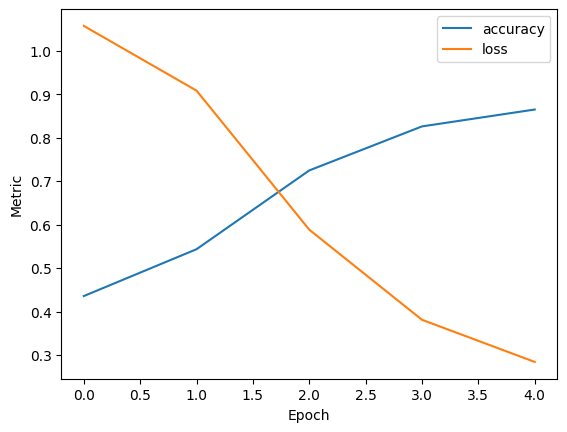

In [6]:


# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()
